In [3]:
import pandas as pd

In [4]:
import numpy as np
from sklearn import model_selection


In [5]:
df = pd.read_csv('C:/Users/halah/Desktop/multi_CFM_data.csv')

In [6]:
df.head(5)

,Area.,Complaint Channel,Complaint Status,Industry,Sub complaint,Type Of Complaint,predicted
0,0,6,0,6,12,6,0
1,0,0,0,6,27,10,0
2,0,0,0,6,15,9,0
3,0,0,0,6,31,0,0
4,0,0,0,6,12,8,0


In [25]:
 import csv
df.to_csv("C:/Users/halah/Desktop/data/new_CFM_data-grouped-copy.csv")

In [26]:
df.head(3)

,Area.,Complaint Channel,Complaint Status,Industry,Sub complaint,Type Of Complaint,predicted
0,0,6,0,6,12,6,0
1,0,0,0,6,27,10,0
2,0,0,0,6,15,9,0


In [7]:
df.predicted.value_counts()

0    31509
1     2338
2      113
Name: predicted, dtype: int64

In [8]:
X = df[["Complaint Status","Industry","Type Of Complaint","Sub complaint","Complaint Channel","Area."]]
y = df['predicted']   #target column is Aging

In [9]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate


In [10]:
 from imblearn.over_sampling import BorderlineSMOTE
X_resampled, y_resampled = BorderlineSMOTE().fit_resample(X, y)

C:\Users\halah\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [11]:
X.shape, X_resampled.shape,y.shape, y_resampled.shape

((33960, 6), (94527, 6), (33960,), (94527,))

In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, make_scorer

knn= KNeighborsClassifier(n_neighbors=3)
scores = cross_val_score(knn, X_resampled, y_resampled , cv=10, scoring='accuracy'
print (scores)

[0.58806728 0.68306358 0.68063049 0.69364223 0.67311964 0.73172538
 0.80048662 0.77224162 0.7574315  0.66550265]


In [33]:
print(scores.mean())

0.7045910981480643


In [36]:
from sklearn import preprocessing
from sklearn import svm
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=0)
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_transformed = scaler.transform(X_train)
clf = svm.SVC(C=1).fit(X_train_transformed, y_train)
X_test_transformed = scaler.transform(X_test)
clf.score(X_test_transformed, y_test)

C:\Users\halah\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


0.634824923304771

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X , y,test_size=0.2)


In [13]:
k_range = list(range(1, 31))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_resampled, y_resampled, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)

[0.6943508888586643, 0.6685798612685316, 0.7045910981480643, 0.6847024963940229, 0.7088333224188508, 0.6983069656227382, 0.7104091419705512, 0.701670956897869, 0.7070666505468155, 0.7009413388543824, 0.7061990096366484, 0.7002642580922492, 0.7057126401461533, 0.6994392306801066, 0.7059454746036784, 0.700539481041544, 0.7043163722275115, 0.7020521980928202, 0.7039142726169068, 0.7009204334224963, 0.704252843222694, 0.7011744453343944, 0.7034805545900437, 0.6995873989780685, 0.7002115629706871, 0.6975985015255087, 0.6985718785839382, 0.6972178816164851, 0.7007934157124891, 0.6981593548029601]


Text(0, 0.5, 'Cross-Validated Accuracy')

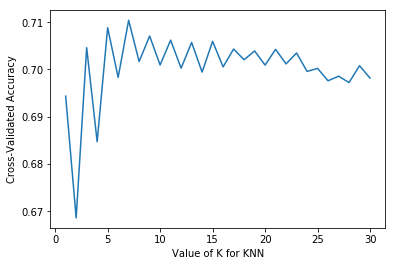

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [27]:
knn = KNeighborsClassifier(n_neighbors=7)
print(cross_val_score(knn, X_resampled, y_resampled, cv=10, scoring='accuracy').mean())

0.7104091419705512


In [25]:
from sklearn import svm
clfv = svm.SVC(kernel='linear', C=1)
print(cross_val_score(clfv, X_resampled, y_resampled, cv=10, scoring='accuracy').mean())

0.39238634581446385


In [24]:
from sklearn.tree import DecisionTreeClassifier  

clf = DecisionTreeClassifier()

print(cross_val_score(clf, X_resampled, y_resampled, cv=10, scoring='accuracy').mean())

0.7262135007111207


In [17]:
from sklearn.naive_bayes import GaussianNB

#create an object of the type GaussianNB
gnb = GaussianNB()
print(cross_val_score(gnb, X_resampled, y_resampled , cv=10, scoring='accuracy').mean())

0.3662560671929126


In [34]:
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier(n_estimators=100)

print(cross_val_score(clf, X_resampled, y_resampled, cv=10, scoring='accuracy').mean())

0.7348141330794457


In [21]:
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()
print(cross_val_score(logreg, X_resampled, y_resampled, cv=10, scoring='accuracy').mean())

0.4136598207674057


In [35]:
from sklearn.tree import DecisionTreeClassifier  
clft = DecisionTreeClassifier(criterion="entropy", max_depth=200)
print(cross_val_score(clft, X_resampled, y_resampled, cv=10, scoring='accuracy').mean())


0.7262664241972397
